# LAB 04
## CLASSIFICATION PROJECT

 Description: The dataset contains information about student performance, with the goal of predicting whether a student will Pass or Fail. The dependent variable is Pass-Fail rest are independent. The dataset contain 708 rows and 10 columns.

# DATA PREPROCESSING

# 1. Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# 2. Load dataset

In [7]:
df = pd.read_csv('student_performance_dataset.csv')  
df.shape

(708, 10)

# 3. Explore the data

In [9]:
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [11]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [12]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [13]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

# 4. Defining the Target Column for Prediction

In [15]:
target_col=df['Pass_Fail']

# Checking Class Distribution in the Target Column

In [17]:
target_col.value_counts()

Pass_Fail
Pass    354
Fail    354
Name: count, dtype: int64

# Dropping Unnecessary Columns from the DataFrame

In [19]:
df = df.drop(['Student_ID', 'Gender', 'Pass_Fail'], axis=1)

# 5. Identifying Numerical and Categorical Columns in the DataFrame

In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

## Impute numerical columns with mean

In [23]:
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

## Impute categorical columns with most frequent

In [25]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 6. One-Hot Encoding Categorical Columns and Previewing Transformed Data

In [27]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head(2)

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD,Internet_Access_at_Home_Yes,Extracurricular_Activities_Yes
0,31.0,68.267841,86.0,63.0,True,False,False,True,True
1,16.0,78.222927,73.0,50.0,False,False,True,False,False


# Displaying Columns In Dataframe

In [29]:
df.columns

Index(['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
       'Final_Exam_Score', 'Parental_Education_Level_High School',
       'Parental_Education_Level_Masters', 'Parental_Education_Level_PhD',
       'Internet_Access_at_Home_Yes', 'Extracurricular_Activities_Yes'],
      dtype='object')

# 7. Scaling Numerical Features Using StandardScaler

In [31]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Defining Features (X) and Target Variable (y)

In [33]:
X = df 
y = target_col

In [34]:
X

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD,Internet_Access_at_Home_Yes,Extracurricular_Activities_Yes
0,0.548640,-0.713394,0.564773,0.631059,True,False,False,True,True
1,-1.142177,0.008352,-0.338471,-1.308910,False,False,True,False,False
2,-0.578571,0.682762,-0.268991,-0.562768,False,False,True,True,False
3,0.097755,1.012739,1.468017,0.929516,False,False,False,False,False
4,1.224966,1.489721,-1.033274,1.675657,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
703,-1.367619,0.474952,0.008930,-1.308910,False,False,True,True,False
704,0.999524,-1.292588,0.356332,0.481831,False,True,False,False,False
705,-0.127687,1.470106,-0.199511,-0.264311,False,False,False,True,False
706,-0.578571,1.307926,0.425812,0.929516,False,False,False,True,False


In [35]:
y

0      Pass
1      Fail
2      Fail
3      Pass
4      Pass
       ... 
703    Fail
704    Pass
705    Fail
706    Pass
707    Fail
Name: Pass_Fail, Length: 708, dtype: object

# 8. Train-test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 9. Final check

In [39]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (566, 9)
Testing data shape: (142, 9)


# Importing Libraries for Model Training and Evaluation

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training the Random Forest Classifier Model

In [43]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluating Model Performance on Test Data

In [45]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      1.00      1.00        71
        Pass       1.00      1.00      1.00        71

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



# Displaying Model Accuracy 

In [47]:
print(X_train.shape, X_test.shape)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

(566, 9) (142, 9)
Train Accuracy: 1.0
Test Accuracy: 1.0


# Importing Libraries for Data Visualization and Model Evaluation

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Random Forest: Confusion Matrix

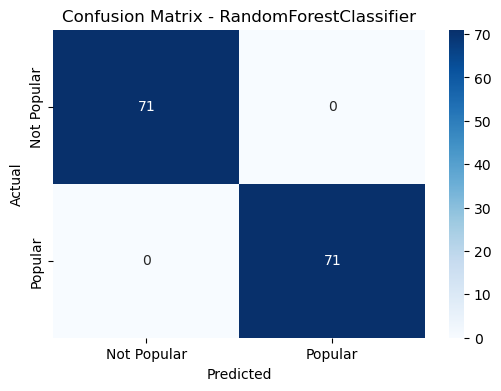

In [51]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

# Libraries for Building and Evaluating a Neural Network Model

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Applying Label Encoding to the Target Variable

In [55]:
le = LabelEncoder()
y = le.fit_transform(y)

# Identifying Categorical Columns in the Feature Set

In [57]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Applying One-Hot Encoding to Categorical Features 

In [59]:
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Data Transformation 

In [61]:
X_processed = preprocessor.fit_transform(X)

# Scaling Features Using StandardScaler

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Train-test split 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Building ANN

In [67]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model Compilation

In [69]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training model

In [71]:
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7877 - loss: 0.5924
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9079 - loss: 0.4295
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.3240 
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9458 - loss: 0.2150 
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9295 - loss: 0.1967
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9502 - loss: 0.1597  
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9559 - loss: 0.1224
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9565 - loss: 0.1129
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.0912
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0790
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9833 - loss: 0.0697  
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.99

# Predictions and Evaluation

In [73]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


# Evaluating Model Performance

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9788732394366197
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.97      0.99      0.98        71

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



# ANN Confusion Matrix

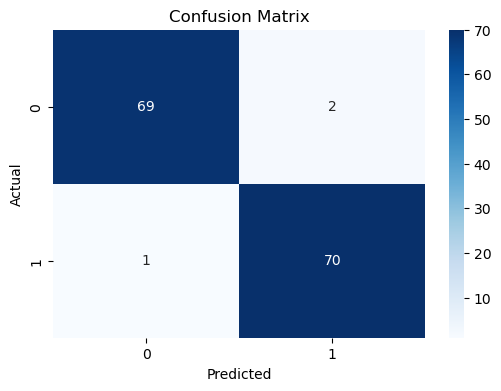

In [77]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()